# Social Media and Network Analytics
# Assignment 1

## Arlo Rostirolla
## s3872916


# Install requirements

In [1]:
# Install requirements
!pip install uctopic
!pip install emoji
!pip install tweepy --upgrade
!pip install --upgrade twarc
!pip install twarc-csv --user
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd twint
!pip3 install . -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895254 sha256=a0ab345b73b396b1054e1b6015c839fd7e467bad60d09ac2fb232e6b9a1958e3
  Stored in directory: I:\Temp\pip-ephem-wheel-cache-m28if3n1\wheels\87\39\dd\a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'e:\visualstudio\3\python37_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


You should consider upgrading via the 'e:\visualstudio\3\python37_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.10.0
    Uninstalling tweepy-4.10.0:
      Successfully uninstalled tweepy-4.10.0


You should consider upgrading via the 'e:\visualstudio\3\python37_64\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Attempting uninstall: twarc
    Found existing installation: twarc 2.11.1
    Uninstalling twarc-2.11.1:
      Successfully uninstalled twarc-2.11.1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'e:\visualstudio\3\python37_64\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Created wheel for twarc-csv: filename=twarc_csv-0.5.2-py3-none-any.whl size=9668 sha256=f5ee53bd4eff54ab28bd599b451435f4b93f038fcb2d96fb321280b3dc91bc5a
  Stored in directory: I:\Temp\pip-ephem-wheel-cache-ave7bgjh\wheels\8b\da\29\686e584f0162297399d799af5306e4f559960bafb385ba5755
Successfully built twarc-csv


You should consider upgrading via the 'e:\visualstudio\3\python37_64\python.exe -m pip install --upgrade pip' command.
Cloning into 'twint'...


Defaulting to user installation because normal site-packages is not writeable


ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.
You should consider upgrading via the 'e:\visualstudio\3\python37_64\python.exe -m pip install --upgrade pip' command.


# Import dependencies
# Scrape using Twint

In [2]:
import uctopic
from uctopic import UCTopic, UCTopicTokenizer, UCTopicTool
import pickle
import re, nltk, json, emoji, tweepy, time, os, twarc, math
import twarc
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pprint

nltk.download('stopwords')
#os.mkdir('./data/')
#!twint -s "DanAndrews OR daniel andrews OR DictatorDan OR IStandWithDan \
#        OR ThanksDan OR SackDanAndrews" -o ./data/twint/daniel.json --json 

# set to true if running for the first time and you have no data
SCRAPE = False

# runs multiple times to cover any days that weren't scraped presumably due to twitter limits
if SCRAPE:
    count = 0
    for month in range(1, 8):
        if int(month) < 10:
            month = str(0) + str(month)    
        for day in range(1, 30):
            if int(day) < 10:
                day = str(0) + str(day)
            if f'daniel{month}{day}.json' not in os.listdir('./data/twint/'):
                !twint -s "DanAndrews OR danandrews OR Daniel Andrews OR daniel andrews \
                OR Dan Andrews OR dan andrews or OR DictatorDan OR IStandWithDan \
                OR ThanksDan OR SackDanAndrews OR istandwithdanandrews OR DanLiedPeopleDied \
                OR victorian premier" -o ./data/twint/daniel{day}{month}.json --json --until 2022-{month}-{day} --limit 10000000

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arlos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Tweepy streaming

Unused for the current project

In [3]:
'''CONSUMER_KEY = ''
CONSUMER_SECRET = ''
ACCESS_TOKEN = ''
ACCESS_TOKEN_SECRET = ''
BEARER_TOKEN = ''

with open('./data//twint/daniel.json', 'r', encoding='utf-8') as dan:
    df = pd.read_json(dan, lines=True, encoding='utf-8')
    
class MyStreamListener(tweepy.StreamingClient):
    def on_connect(self):
        print('successfully connected')
        
    def on_data(self, tweet):
        temp = json.loads(tweet)
        print(temp)
        df.append(temp, ignore_index=True)
        df.to_json('daniel1.json')
        time.sleep(0.2)
    
    def on_error(self, status_code):
        if status_code == 420:
            print(status_code)
            return False
        
stream = MyStreamListener(BEARER_TOKEN)
search = ['DanAndrews', 'daniel andrews', 'DictatorDan' 'IStandWithDan', 'ThanksDan', 'SackDanAndrews']
for term in search:
    stream.add_rules(tweepy.StreamRule(term))
stream.filter(tweet_fields= ['public_metrics', 'lang', 'context_annotations', 'created_at'], user_fields=['id', 'name', 'username', 'created_at', 'location', 'public_metrics', 'verified'])'''


"CONSUMER_KEY = ''\nCONSUMER_SECRET = ''\nACCESS_TOKEN = ''\nACCESS_TOKEN_SECRET = ''\nBEARER_TOKEN = ''\n\nwith open('./data//twint/daniel.json', 'r', encoding='utf-8') as dan:\n    df = pd.read_json(dan, lines=True, encoding='utf-8')\n    \nclass MyStreamListener(tweepy.StreamingClient):\n    def on_connect(self):\n        print('successfully connected')\n        \n    def on_data(self, tweet):\n        temp = json.loads(tweet)\n        print(temp)\n        df.append(temp, ignore_index=True)\n        df.to_json('daniel1.json')\n        time.sleep(0.2)\n    \n    def on_error(self, status_code):\n        if status_code == 420:\n            print(status_code)\n            return False\n        \nstream = MyStreamListener(BEARER_TOKEN)\nsearch = ['DanAndrews', 'daniel andrews', 'DictatorDan' 'IStandWithDan', 'ThanksDan', 'SackDanAndrews']\nfor term in search:\n    stream.add_rules(tweepy.StreamRule(term))\nstream.filter(tweet_fields= ['public_metrics', 'lang', 'context_annotations', 'cr

# Scraping with twarc library (REST / Stream)


In [4]:
# Uncomment to scrape with twarc

#!twarc2 search "dan andrews OR daniel andrews OR danandrews OR danielandrews OR IStandWithDan OR SackDanAndrews OR IStandWithDanAndrews OR DanMustGo OR DanLiedPeopleDied" ./data/twarc/dan.jsonl --start-time 2022-07-31 --end-time 2022-08-06 --limit 20000 
#!twarc2 stream-rules add "dan andrews"
#!twarc2 stream-rules add "victorian premier"
#!twarc2 stream-rules add "istandwithdanandrews"
#!twarc2 stream-rules add "DanLiedPeopleDied"
#!twarc2 stream-rules add "DanAndrews"
#!twarc2 stream-rules add "daniel andrews"
#!twarc2 stream-rules add "DictatorDan"
#!twarc2 stream-rules add "IStandWithDan"
#!twarc2 stream-rules add "ThanksDan"
#!twarc2 stream-rules add "SackDanAndrews"
#!twarc2 stream > stream1.jsonl

# Merge Twint data
## Load all dataframes and concatenate into single dataframe


In [5]:
import pprint
# set MERGE to false if running for the first time (SCRAPE = True)
MERGED = True
SUBMISSION = True

#!twarc2 csv ./data/twarc/dan.jsonl ./data/twarc/dan.csv

if not MERGED:
    dataframes_twint = []
    for file in os.listdir('./data/twint/'):
        with open(os.getcwd()+'./data/twint/'+file, 'r', encoding='utf-8') as day:
                temp = pd.read_json(day, lines=True)
                dataframes_twint.append(temp)
    
    df1 = pd.concat(dataframes_twint, ignore_index=True)
    df1.to_json("Data1.json")

if SUBMISSION:
  df = pd.read_csv('./data.csv')
else:
  df1 = pd.read_json("/content/gdrive/MyDrive/TwitterProject/Data1.json")
  twarc_df = pd.read_csv("/content/gdrive/MyDrive/TwitterProject/data/twarc/dan.csv")
  stream_df = pd.read_csv("/content/gdrive/MyDrive/TwitterProject/data/twarc/stream.csv")
  stream2_df = pd.read_csv("/content/gdrive/MyDrive/TwitterProject/data/twarc/stream1.csv")
  stream3_df = pd.read_csv("/content/gdrive/MyDrive/TwitterProject/data/twarc/stream2.csv")
  stream4_df = pd.read_csv("/content/gdrive/MyDrive/TwitterProject/data/twarc/stream3.csv")
  stream5_df = pd.read_csv("/content/gdrive/MyDrive/TwitterProject/data/twarc/stream4.csv")

  pprint.pprint({'Twint historical tweets': df1.shape[0], 'Twarc REST api tweets': twarc_df.shape[0], \
                   'Twarc streams': stream_df.shape[0]+stream2_df.shape[0]+stream3_df.shape[0]+stream4_df.shape[0]+stream5_df.shape[0]})

  df = pd.concat([df1, twarc_df, stream_df, stream2_df, stream3_df, stream4_df, stream5_df], ignore_index=True).reset_index()

# Remove sparse/redundant fields

In [9]:

df = df.drop(["conversation_id", "timezone", "timezone", "user_id", "place", "mentions", "urls", 
            "photos", "cashtags", "link", "quote_url", "video", "thumbnail", "near", "geo", "source", 
            "user_rt_id", "user_rt", "retweet_id", "retweet_date", "translate", "trans_src", 
            "trans_dest", "__twarc.retrieved_at", "geo.place_type", "geo.place_id", "geo.name", "geo.id",
            "geo.geo.type", "geo.geo.bbox", "geo.full_name", "geo.country_code", "geo.coordinates.type",
            "geo.coordinates.coordinates", "author.withheld.country_codes", "author.withheld.copyright",
            "author.withheld.scope", "author.url", "author.profile_image_url", "author.pinned_tweet_id",
            'author.entities.url.urls', 'author.entities.description.urls', 'author.entities.description.mentions',
            'possibly_sensitive', 'withheld.scope', 'withheld.copyright', 'withheld.country_codes', 'entities.annotations',
            'entities.cashtags', 'entities.cashtags', 'entities.hashtags', 'entities.urls', 'attachments.media',
            'attachments.poll.duration_minutes', 'attachments.poll.end_datetime',
            'attachments.poll.id', 'attachments.poll.options', 'attachments.poll.voting_status', 'attachments.poll_ids',
            '__twarc.url', '__twarc.version'], axis=1)


SyntaxError: invalid syntax (1950762525.py, line 15)

# Data Preprocessing
*   Merge tweet/text columns
*   Drop duplicates







In [11]:
CHECKED = True
# Merge 'tweet' and 'text' columns from different scraping methods
if not SUBMISSION:
    df['tweet'].update(df.pop('text'))

# put retweets in their own dataframe
retweets = df[df.retweeted_user_id.notnull()]

# drop duplicates due to using different scraping methods
print("before: " + str(df.shape[0]))
before = df.shape[0]
df = df.drop_duplicates(['id', 'created_at', 'date', 'time', 'username', 'name', 'tweet',
                        'replies_count', 'retweets_count'])
after = df.shape[0]
print(f"{before-after} duplicates removed")

before=df.shape[0]
df = df[~df.retweeted_user_id.notnull()]
after = df.shape[0]
print(f'{before-after} retweets removed')
print("after: " + str(df.shape[0]))

# if strings are of the same length, calculate hamming distance
def hamming_distance(stringA, stringB):
    if not isinstance(stringA, str) or not isinstance(stringB, str):
        return None
    if len(stringA) != len(stringB):
        return None
    else:
        distance = 0
        for i in range(len(stringA)):
            A_char = stringA[i]
            B_char = stringB[i]
            if A_char != B_char:
                distance += 1
        return distance

# check hamming distance between all tweet pairs. 
# Move duplicates to own dataframe
if not CHECKED:  
  tweets = dict(enumerate(df['tweet'].copy()))
  duplicates = set()
  for i, tweet in tweets.items():
      for j, other in tweets.items():
          if j!=i:
              distance = hamming_distance(tweet, other)
              if distance is not None and distance < 10:
                  duplicates.add(i)
                  duplicates.add(j)

  with open('duplicates.txt', 'w') as d:
      d.write(','.join([str(i) for i in duplicates]))     

before: 100
4 duplicates removed
0 retweets removed
after: 96


# Move duplicates (tweet value only) to own dataframe

In [13]:
if not SUBMISSION:
    # drop duplicates from original df
    with open('./duplicates.txt', 'r') as d:
        dupes = [int(i) for i in d.read().split(',')]

    df_dupes = df.iloc[list(dupes)]
    before = df.shape[0]
    df = df[(~df.index.isin(dupes))]
    after = df.shape[0]

    print(f'{before-after} repeated tweets removed')
    print(df['tweet'].head(500))

# Data Cleaning
*   Remove URL's/Username tags/hashtags
*   Remove tweets that don't contain keywords
*   Remove tweets known to be inorganic  (Related to WHO   conspiracy theories, repeated tweets from a single individual accusing victoria police/government of misfeasance)


In [14]:
total = 0
N_conspiracy_tweets = 0
terms = ['danandrews', 'danielandrews' 'dan andrews', 'daniel andrews', 'sackdanandrews',
         'dictatordan', 'dictator dan' 'istandwithdan', 'istoodwithdan', 'thanksdan', 
         'sack dan andrews', 'danmustgo', 'dan must go', 'victorian premier', 'victorianpremier',
         'dan andrews ', 'andrews', 'labor', 'premier', 'dan fan', 'dan', 'andrews']

df['tweet'] = df['tweet'].map(lambda x: x.lower())
def clean(string):      #[1]
    global total
    global terms
    global N_conspiracy_tweets
    string = re.sub("@[A-Za-z0-9]+", " ", string)
    string = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", string)
    string = re.sub("[^A-Za-z0-9]", " ", string)
   
    delete =['soros','schwab', 'tedros', 'boura', 'bancel', 'gorsky', 'soriot', 'fauci', 
             'daszak', 'walensky', 'wray', 'rothchilds', 'rockefeller', 'rutte', 'leyen', 'jacinda',
             'misfeseance']

    if not any([i in string for i in terms]): 
        total += 1
        return None
    if any([i in string for i in delete]):
      N_conspiracy_tweets += 1
      total += 1
      return None

    string = emoji.demojize(string)
    return string.lower()

df['tweet'] = df['tweet'].map(lambda s: clean(str(s)))
print('Conspiracy tweets: ' + str(N_conspiracy_tweets))
print(f"{total} tweets deleted due to not being about daniel andrews")
df = df.dropna(subset=['tweet'])
step_1 = total
print(f"leftover samples after cleaning: {df.shape[0]}")

retweets['tweet'] = retweets['tweet'].map(lambda s: clean(str(s)))
print(f"{total-step_1} retweets deleted due to not being about daniel andrews")
print(f"leftover retweets after cleaning: {retweets.shape[0]}")
retweets = retweets.dropna(subset=['tweet'])

 # https://stackoverflow.com/questions/64719706/cleaning-twitter-data-pandas-python

Conspiracy tweets: 0
0 tweets deleted due to not being about daniel andrews
leftover samples after cleaning: 96
0 retweets deleted due to not being about daniel andrews
leftover retweets after cleaning: 0


# Exploratory Data Analysis
*   Top K word/hashtag visualization
*   Concordances
*   N-Grams
*   Sentiment visualization






C:\Users\arlos\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:49: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


sackdanandrews    94
corruption        18
dictatordan       15
ibac               9
like               8
dtype: int64
Series([], dtype: float64)


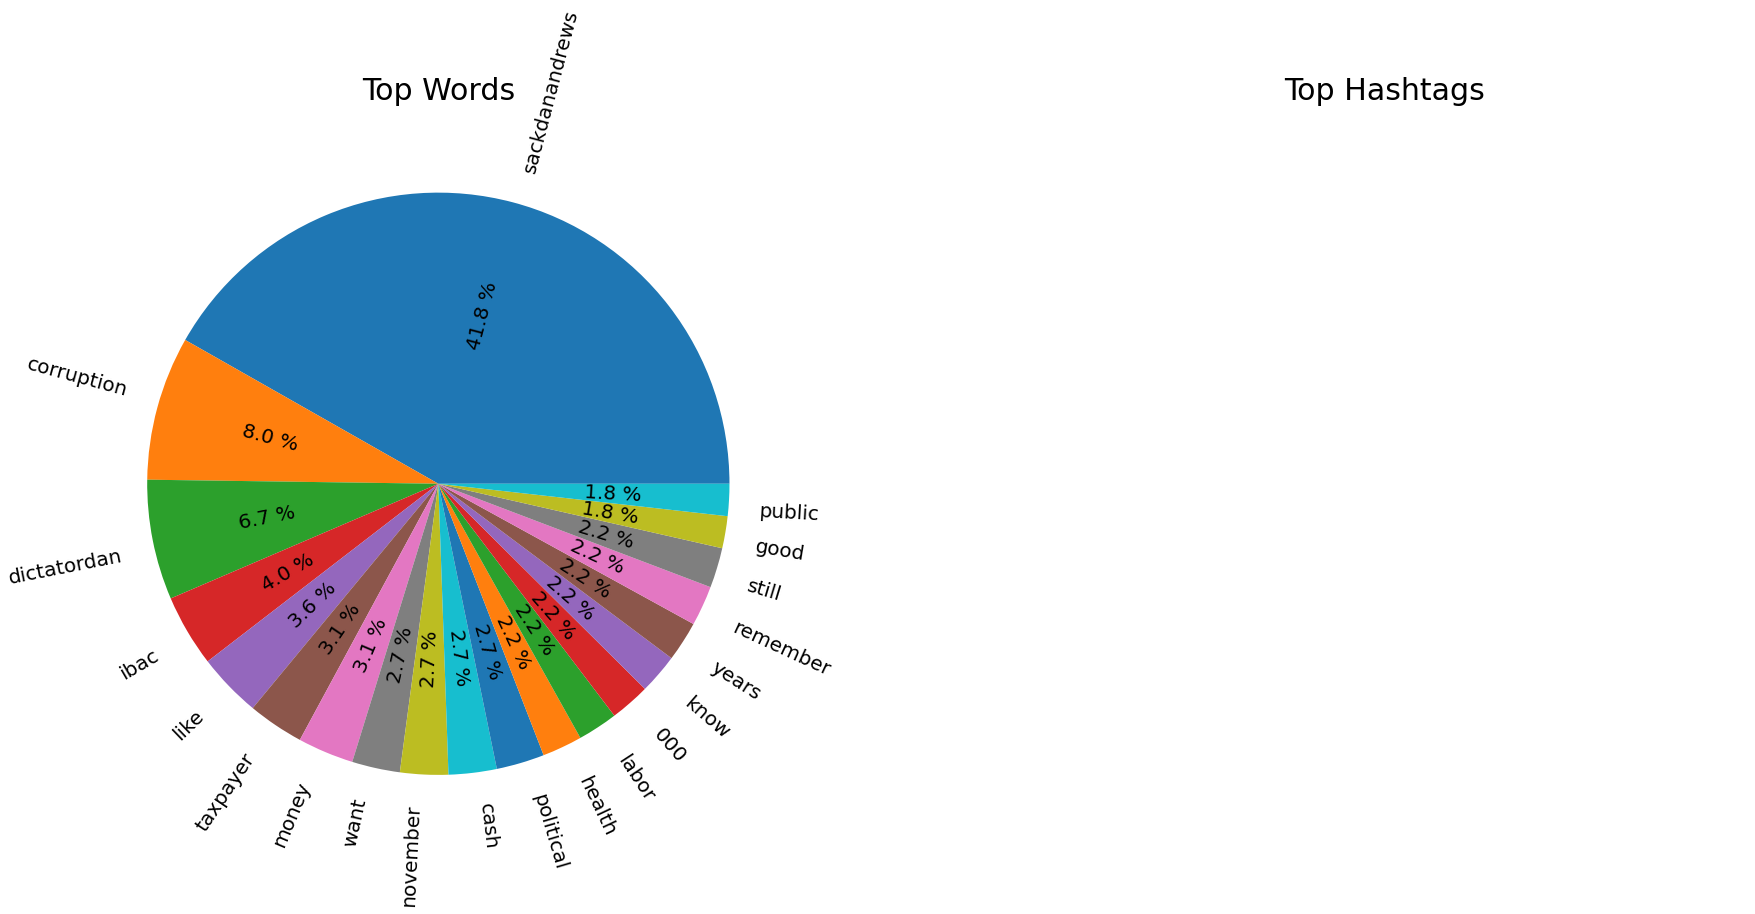

In [16]:
import heapq
from operator import itemgetter #[1]
redundant =  ['danandrews', 'daniel','dan', 'springst', 'vicpol', 'auspol', 'vicvotes', 'vicvotes22', \
                                'live', '9news', 'breaking', '7news', 'ausvotes', 'victoria',
                                'get', 'amp', 'one', 'said', 'says', 'yet', 'andrews', 'premier',
                                'victorian', 'lay', 'state', 'government', 'australia', 'minister',
                                'people', 'would', 'news', 'advised']
ignore = stopwords.words('english')
def count_word_frequencies(dataframe):
    words = {}
    for index, row in df.iterrows():
        tweet_words = row['tweet'].split()
        for word in tweet_words:
            if word in ignore or word in redundant or len(word)<2:
                continue
            if word not in words.keys():
                words[word] = 1
            else:
                words[word] += 1
    return words

def count_hashtags(dataframe):
    tags = {}
    for index, row in df.iterrows():
        hashtags = row['hashtags']
        if isinstance(hashtags, list) and any(hashtags):
            for i in hashtags:
                if i not in tags.keys():
                    tags[i] = 1
                else:
                    tags[i] += 1
        
        tweet_hashtags = re.findall("#[A-Za-z0-9]", str(row['tweet']))
        if any(tweet_hashtags):
          for i in tweet_hashtags:
            if i not in tags.keys():
              tags[i] = 1
            else: 
              print(tags[i])
              tags[i] += 1
    return tags
            
words, tags = count_word_frequencies(df), count_hashtags(df)

words = heapq.nlargest(20, words.items(), key=itemgetter(1))
tags = heapq.nlargest(20, tags.items(), key=itemgetter(1))

words_df = pd.Series([i[1] for i in words], index=[i[0] for i in words])
tags_df =  pd.Series([i[1] for i in tags], index=[i[0] for i in tags])
print(words_df.head())
print(tags_df.head())
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figheight(30)
f.set_figwidth(30)
ax1.set_title('Top Words', pad=20.0, fontdict={'fontsize': 30})
ax2.set_title('Top Hashtags', pad=20.0, fontdict={'fontsize': 30})

_, labels, percentages = ax1.pie(words_df, autopct='%1.1f %%', labels = [i[0] for i in words], rotatelabels=True, textprops={'fontsize': 20})
for label, percent in zip(labels, percentages):
    percent.set_rotation(label.get_rotation())

_, labels, percentages = ax2.pie(tags_df, autopct='%1.1f %%', labels = [i[0] for i in tags], rotatelabels=True, textprops={'fontsize': 20})
for label, percent in zip(labels, percentages):
    percent.set_rotation(label.get_rotation())
plt.subplots_adjust(wspace=0.3)
plt.show()


# [1] https://stackoverflow.com/questions/12266617/finding-top-k-largest-keys-in-a-dictionary-python

In [17]:
# check for concordances around the premiers first name
all_text = " ".join([i for i in df['tweet']])
tokens = nltk.wordpunct_tokenize(all_text)
text = nltk.Text(tokens)
concordances = text.concordance("dan", lines = 100, width = 200)

Displaying 17 of 17 matches:
ews dannext vicpolviolence dandogs stoptheshots endthemandates nuremberg2 nurembergtrialsforcovid dan andrews destroyed melbourne n sackdanandrews n nmelbourne s shock office occupancy rate revealed 
 repay the money you have stolen from the taxpayers corruption ibacdan sackdanandrews springst if dan were a level crossing he d have been removed and replaced by a sky rail by now n n dictatordan sa
d and bendigo hospitals and from outpatients are not included he is full of bs and spin just like dan rememberinnovember sackdanandrews was cash paid were taxpayer funds stolen where do 10 000 cash f
ein epstein we don t see you standing up for basic transparency when it concerns your mate despot dan andrews you re a f ing hypocrite danliedpeopledied youralpbc prefer a cooler to a morally vacuous
andrews you re a f ing hypocrite danliedpeopledied youralpbc prefer a cooler to a morally vacuous dan lover sackdanandrews i wouldn t say you re a troll but you do have se

mean: 22.333333333333332
std: 15.178566760036631
max: 57
min: 1


mean: 118.27083333333333
std: 71.51842407826733
max: 236
min: 14


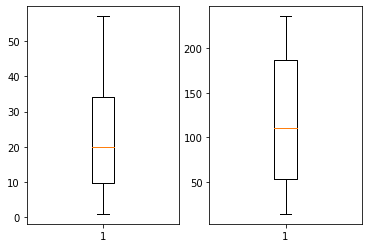

In [18]:
# Visualize distributions for tweet length (words/chars)
distribution = []
chars = []
for tweet in df['tweet']:
  words = tweet.split()
  count = len(words)
  char = len("".join(words))
  chars.append(char)
  distribution.append(count)
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(distribution)
ax[1].boxplot(chars)
print('mean: '+str(np.mean(distribution)))
print('std: '+ str(np.std(distribution)))
print('max: '+str(np.max(distribution)))
print('min: '+str(np.min(distribution)))

print('\n')
print('mean: '+str(np.mean(chars)))
print('std: '+ str(np.std(chars)))
print('max: '+str(np.max(chars)))
print('min: '+str(np.min(chars)))

In [19]:
# check most frequent bigrams, trigrams and quadgrams
bigram = nltk.collocations.BigramCollocationFinder.from_words(text)
trigram = nltk.collocations.TrigramCollocationFinder.from_words(text)
quadgram= nltk.collocations.QuadgramCollocationFinder.from_words(text)

pprint.pprint(bigram.ngram_fd.tabulate(20))
pprint.pprint(trigram.ngram_fd.tabulate(20))
pprint.pprint(quadgram.ngram_fd.tabulate(20))

             ('n', 'sackdanandrews')     ('sackdanandrews', 'corruption')              ('sackdanandrews', 'n')                   ('dan', 'andrews')                       ('for', 'the')                         ('don', 't')                       ('and', 'his')                   ('in', 'november')    ('dictatordan', 'sackdanandrews')                           ('n', 'n')                       ('doesn', 't')                          ('is', 'a')                      ('from', 'the')                         ('to', 'be') ('sackdanandrews', 'sackdanandrews')                   ('andrews', 'and')                       ('his', 'mob')                        ('10', '000')                      ('cash', 'for')                    ('for', 'access') 
                                  21                                   10                                    9                                    8                                    7                                    7                                    7 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arlos\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


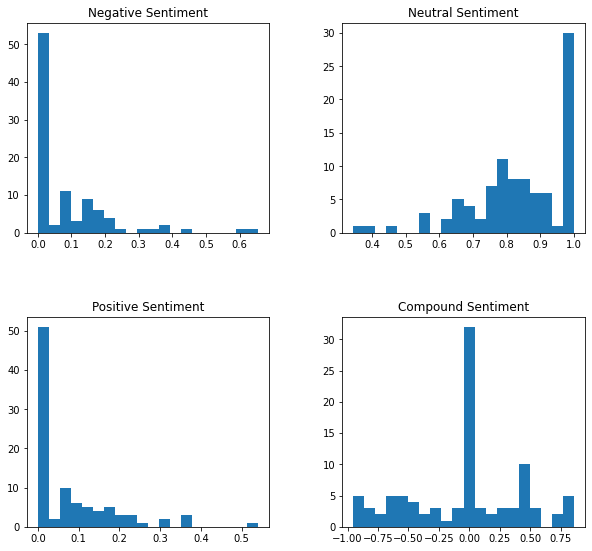

In [22]:
CALCULATED = False
# perform sentiment analysis

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def calculate_sentiment(row):
  row['negative'] = sia.polarity_scores(row['tweet'])['neg']
  row['positive'] = sia.polarity_scores(row['tweet'])['pos']
  row['neutral'] = sia.polarity_scores(row['tweet'])['neu']
  row['compound'] = sia.polarity_scores(row['tweet'])['compound']
  return row

if not CALCULATED:
  df = df.apply(lambda row: calculate_sentiment(row), axis=1)
  
fig, axes = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.subplots_adjust(wspace = 0.3, hspace = 0.4, top=6, bottom=5)

axes[0][0].set_title('Negative Sentiment')
axes[0][0].hist(df['negative'], bins = 20)
axes[0][1].set_title('Neutral Sentiment')
axes[0][1].hist(df['neutral'],bins = 20)
axes[1][0].set_title('Positive Sentiment')
axes[1][0].hist(df['positive'],bins = 20)
axes[1][1].set_title('Compound Sentiment')
axes[1][1].hist(df['compound'], bins = 20)
plt.show()

KeyError: 'negative'

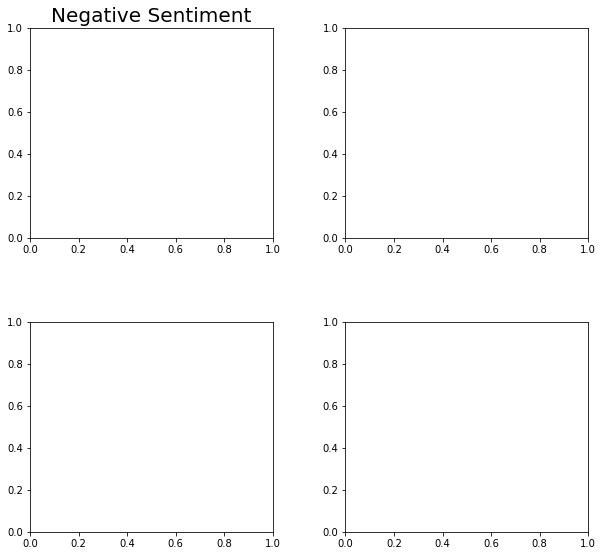

In [24]:
# Make a dataframe with a single-strongest-sentiment post per user id, to replot
# sentiment based on unique users
unique_df = pd.DataFrame()
unique_ids = set()
for i, row in df.iterrows():
  unique_ids.add(row['username'])

for i in unique_ids:
  subset = df[df['username'] == i]
  if len(subset) == 0:
    continue
  if len(subset) == 1:
    unique_df.append(subset.iloc[0])
  else:
    mean = sum(subset['compound'])/len(subset)
    if mean > 0:
      maximum = max(subset['compound'])
      row = df[df['compound'] == maximum]
      row['mean'] = mean
    elif mean < 0:
      minimum = min(subset['compound'])
      row = df[df['compound'] == minimum]
      row['mean'] = mean
    unique_df = unique_df.append(row)

fig, axes = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.subplots_adjust(wspace = 0.3, hspace = 0.4, top=6, bottom=5)

axes[0][0].set_title('Negative Sentiment', fontsize=20)
axes[0][0].hist(unique_df['negative'], bins = 20)
axes[0][1].set_title('Neutral Sentiment', fontsize=20)
axes[0][1].hist(unique_df['neutral'],bins = 20)
axes[1][0].set_title('Positive Sentiment', fontsize=20)
axes[1][0].hist(unique_df['positive'],bins = 20)
axes[1][1].set_title('Compound Sentiment', fontsize=20)
axes[1][1].hist(unique_df['compound'], bins = 20)
plt.show()

print('num_positive' + str(len(unique_df[unique_df['compound'] > 0])))
print('num_negative'+ str(len(unique_df[unique_df['compound'] < 0])))

# Calculate correlation between author description sentiment and mean tweet sentiment

Correlation: 0.013634656084405965
P Value: 0.13763635572403873


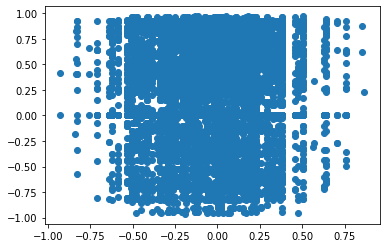

In [17]:
from scipy.stats.stats import pearsonr   

tweet_sentiments = []
description_sentiments = []

for index, row in unique_df.iterrows():
  if row['author.description'] == 'NaN':
    continue
  if isinstance(row['author.description'], str):
    sentiments = sia.polarity_scores(row['author.description'])
    description_sentiments.append(sentiments['compound'])
    tweet_sentiments.append(row['mean'])

print(plt.scatter(tweet_sentiments, description_sentiments))
statistics = pearsonr(tweet_sentiments, description_sentiments)
print('Correlation: '+str(statistics[0])+'\nP Value: '+str(statistics[1]))



In [18]:
# calculate difference in engagement beteen positive and negative sentiment tweets
positive_instances = df[df['compound'] > 0]
negative_instances = df[df['compound'] < 0]

pos_statistics = positive_instances[['replies_count', 'retweets_count', 'likes_count']].describe()
neg_statistics = negative_instances[['replies_count', 'retweets_count', 'likes_count']].describe()

pprint.pprint(pos_statistics)
pprint.pprint(neg_statistics)


       replies_count  retweets_count  likes_count
count     785.000000      785.000000   785.000000
mean        6.484076        5.979618    34.285350
std        34.386275       42.978929   224.557899
min         0.000000        0.000000     0.000000
25%         0.000000        0.000000     0.000000
50%         0.000000        0.000000     1.000000
75%         1.000000        1.000000     6.000000
max       690.000000      985.000000  3683.000000
       replies_count  retweets_count  likes_count
count     876.000000      876.000000   876.000000
mean        9.071918       11.265982    56.711187
std        44.129659       89.615643   450.617610
min         0.000000        0.000000     0.000000
25%         0.000000        0.000000     0.000000
50%         0.000000        0.000000     1.000000
75%         2.000000        2.000000     7.000000
max       712.000000     1974.000000  9193.000000


## Seperate pro/anti premier hashtags based on hashtags used

anti: 3953
pro: 1090
num anti sockpuppet accounts: 362
num pro sockpuppet accounts: 32
46.0     well  dan andrews has certainly exceeded the 19 billion black hole we were all warned about back in 2014   n n sackdanandrews his is the  labortrash in  springst  

46.0       important to remember the politicians who played us  let s  sackdanandrews in november for starters 

41.0           vote the filthy labor government out in november        sackdanandrews  sackdanandrews  sackdanandrews

41.0            sackdanandrews

41.0         musn yes we are asking   to step down       sackdanandrews  sackdanandrews  sackdanandrews      

41.0         he s a bloody muppet god help australia         sackdanandrews  sackdanandrews  sackdanandrews

41.0                  sackdanandrews  sackdanandrews  sackdanandrews

41.0      sackdanandrews  

41.0              sackdanandrews

41.0     why can t we see what  dictatordan had to say behind closed doors when questioned by  ibac  nsack the rotten prick

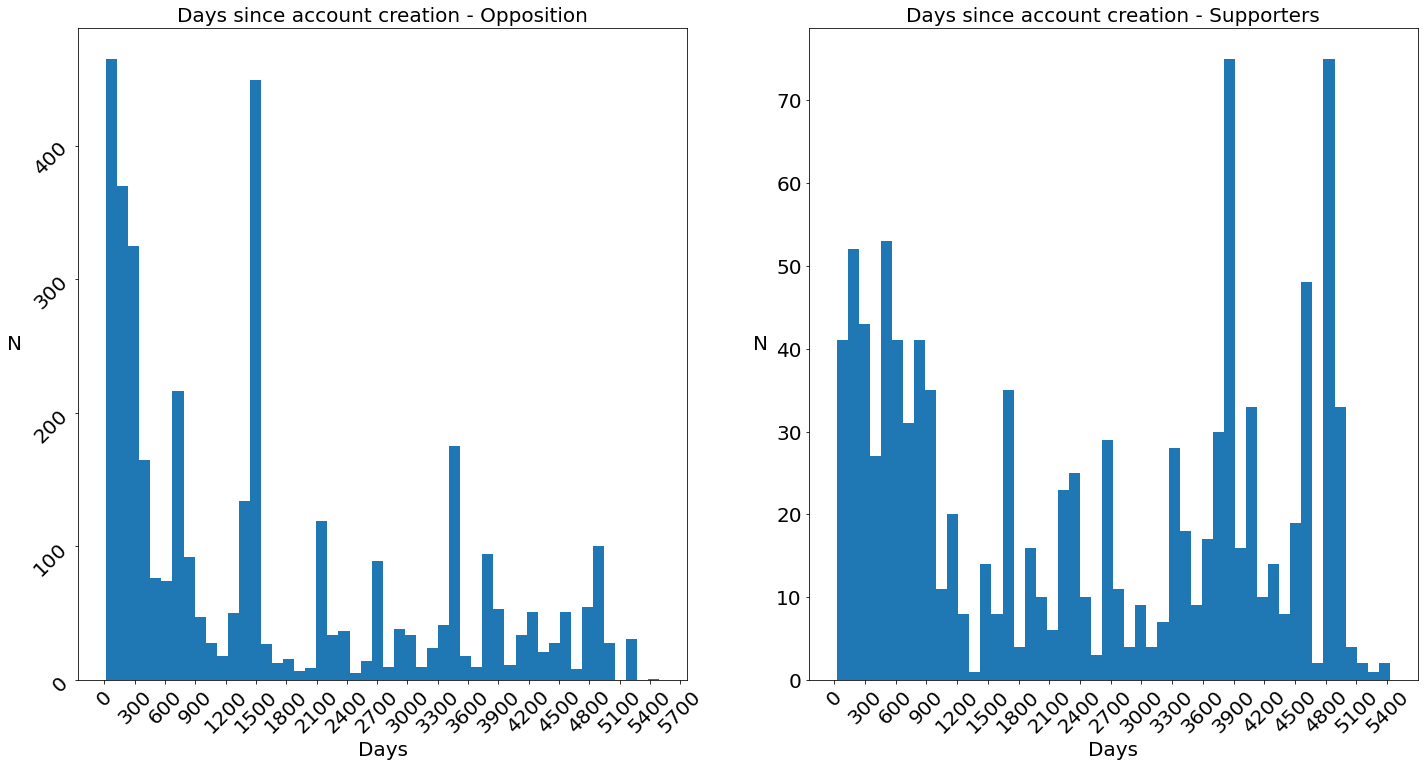

In [19]:
anti_dan = []
pro_dan = []

anti_tags = ['sackdanandrews', 'dictatordan', 'danliedpeopledied', 'danmustgo', 'resigndanandrews', 'resigndanielandrews']
pro_tags = ['istandwithdan', 'thisisnotjournalism', 'newscorpse', 'thanksdan', 'lnpcrimefamily', 'dimtim', 'danforpm']
for i, row in df.iterrows():
  if any([i for i in anti_tags if i in row['tweet']]):
    anti_dan.append(row.to_dict())
  if any([i for i in pro_tags if i in row['tweet']]):
    pro_dan.append(row.to_dict())
print('anti: '+str(len(anti_dan)))
print('pro: '+ str(len(pro_dan)))

anti_dan = pd.DataFrame(anti_dan)
pro_dan = pd.DataFrame(pro_dan)
anti_dan['author.created_at'] = anti_dan['author.created_at']
pro_dan['author.created_at'] = pro_dan['author.created_at']


def cleanTimestamps(time):
  if not isinstance(time, str):
    return
  time = time[:19]
  time = list(time)
  time[10] = " "
  time = "".join(time)
  return time

def ms_since_creation(date):
  if not isinstance(date, str):
    return
  current = time.time()*1000
  past = time.mktime(time.strptime(date, "%Y-%m-%d %H:%M:%S"))*1000
  time_since = current - past
  days_since = int(time_since/(1000*60*60*24))
  return days_since

anti_dan['author.created_at'] = anti_dan['author.created_at'].map(lambda x: cleanTimestamps(x))
pro_dan['author.created_at'] = pro_dan['author.created_at'].map(lambda x: cleanTimestamps(x))
anti_dan['days_since_creation'] = anti_dan['author.created_at'].map(lambda x: ms_since_creation(x))
pro_dan['days_since_creation'] = pro_dan['author.created_at'].map(lambda x: ms_since_creation(x))

fig, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].hist(anti_dan['days_since_creation'], bins = 50)
for tick in axes[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
    tick.label.set_rotation(45)
for tick in axes[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
    tick.label.set_rotation(45)
axes[1].hist(pro_dan['days_since_creation'], bins=50)
axes[0].set_title('Days since account creation - Opposition', fontsize=20)
axes[1].set_title('Days since account creation - Supporters', fontsize=20)
axes[0].set_xlabel("Days", fontsize=20)
axes[1].set_xlabel("Days", fontsize=20)
axes[1].set_ylabel("N", rotation=0, fontsize=20, labelpad=16)
axes[0].set_ylabel("N", rotation=0, fontsize=20, labelpad=16)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)

xloc = plt.MaxNLocator(23)
axes[0].xaxis.set_major_locator(xloc)
axes[1].xaxis.set_major_locator(xloc)

sockpuppets_anti = anti_dan[anti_dan['days_since_creation'] < 60]
sockpuppets_pro = pro_dan[pro_dan['days_since_creation'] < 60]

print('num anti sockpuppet accounts: '+ str(len(sockpuppets_anti)))
print('num pro sockpuppet accounts: '+ str(len(sockpuppets_pro)))

for i, row in sockpuppets_anti.iterrows():
  print(" ".join(str(row['days_since_creation']).split())+'     '+row['tweet'])

### Take 50 organic (accounts > 2 years old) pro/anti premier tweets for final submission

In [ ]:
import random

anti_organic = anti_dan[anti_dan['days_since_creation'] > 730]
pro_organic = pro_dan[pro_dan['days_since_creation'] > 730]
final = pd.DataFrame()

for i in range(50):
  index_anti = random.choice(range(len(anti_organic)))
  row_anti = anti_organic.iloc[index_anti]
  final = pd.concat([final, row_anti])

  index_pro = random.choice(range(len(pro_organic)))
  row_pro = anti_organic.iloc[index_pro]
  final = pd.concat([final, row_pro])

final.to_csv('./data.csv')


## Word movers distance Sentence Similarity

In [ ]:
import gensim
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
similaritys = []
count = 0
temp = pd.DataFrame()
for tweet in anti_dan['tweet']:
  for tweet2 in [i for i in anti_dan['tweet'] if i != tweet]:
    similarity = wv.wmdistance(tweet, tweet2)
    row = {'tweet1': tweet, 'tweet2': tweet2, 'distance': similarity}
    temp = pd.concat([temp, pd.DataFrame([row])], ignore_index=True, axis=1)
    print ('distance:  %.3f' % similarity)
    
temp.to_csv('temp.csv')

[==================================================] 100.0% 1662.8/1662.8MB downloaded
distance:  0.686
distance:  0.908
distance:  0.659
distance:  0.618
distance:  1.268
distance:  0.807
distance:  0.627
distance:  0.680
distance:  0.517
distance:  0.651
distance:  0.570
distance:  0.522
distance:  0.481
distance:  0.597
distance:  0.651
distance:  0.594
distance:  1.096
distance:  0.691
distance:  0.500
distance:  0.442
distance:  0.562
distance:  0.482
distance:  0.606
distance:  1.087
distance:  0.676
distance:  0.789
distance:  0.640
distance:  0.652
distance:  0.593
distance:  0.901
distance:  0.679
distance:  0.941
distance:  0.610
distance:  0.628
distance:  0.603
distance:  0.759
distance:  0.436
distance:  0.633
distance:  0.815
distance:  0.550
distance:  0.565
distance:  0.540
distance:  0.524
distance:  0.528
distance:  0.642
distance:  0.593
distance:  0.662
distance:  0.684
distance:  0.745
distance:  0.785
distance:  0.556
distance:  0.546
distance:  0.568
distance:  0

### Visualize sentiment for news article duplicates

In [ ]:
df_dupes = df_dupes.apply(lambda row: calculate_sentiment(row), axis=1)

# calculate sentiment for duplicates
fig, axes = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(10)
plt.subplots_adjust(wspace = 0.3, hspace = 0.4, top=6, bottom=5)

axes[0][0].set_title('Negative Sentiment', fontsize=20)
axes[0][0].hist(df_dupes['negative'], bins = 20)
axes[0][1].set_title('Neutral Sentiment', fontsize=20)
axes[0][1].hist(df_dupes['neutral'],bins = 20)
axes[1][0].set_title('Positive Sentiment', fontsize=20)
axes[1][0].hist(df_dupes['positive'],bins = 20)
axes[1][1].set_title('Compound Sentiment', fontsize=20)
axes[1][1].hist(df_dupes['compound'], bins = 20)

plt.show()

### Plot compound * N retweets score

In [ ]:
DONE = False

def popularity_score(row):
  row['pop_score'] = row['number'] * row['compound']
  return row

if not DONE:
  counts = {}
  for index, row in retweets.iterrows():
    if row['tweet'] not in counts.keys():
      counts[row['tweet']] = 1
    else:
      counts[row['tweet']] += 1

  df_retweet_counts = pd.DataFrame(counts.items(), columns = ['tweet', 'number'])
  df_retweet_counts = df_retweet_counts.apply(lambda row: calculate_sentiment(row), axis=1)

df_retweet_counts = df_retweet_counts.apply(lambda row: popularity_score(row), axis=1)
plt.hist(df_retweet_counts['pop_score'], bins=60, log=True)
plt.xlabel('Popularity scores', fontsize=18)
plt.ylabel('Num unique tweets with score', fontsize=16)


### plot retweets descriptive statistics

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].boxplot(df_retweet_counts['number'])
axes[0].set_ylim(0,10)
axes[1].boxplot(df_retweet_counts['number'])
print(df_retweet_counts['number'].describe())

In [ ]:
for i, row in df_retweet_counts.iterrows():
  if row['number'] > 75:
    print(row['tweet']+ '\n', row['number'])

### Plot sentiment * time for both periods

In [ ]:
CUTOFF = time.mktime(time.strptime("2022-07-01 00:00:00", "%Y-%m-%d %H:%M:%S"))
print(CUTOFF)

df['created_at'] = df['created_at'].map(lambda x: cleanTimestamps(x))
df['created_at_UNIX'] = df['created_at'].map(lambda x: time.mktime(time.strptime(x, "%Y-%m-%d %H:%M:%S")))

df_historical = df[df['created_at_UNIX'] < CUTOFF]
df_historical['created_at'] = df_historical['created_at'].map(lambda x: x[:11])

df_streamed = df[~df.tweet.isin(df_historical.tweet)]

#df_streamed = df[df['created_at_UNIX'] > CUTOFF]

fig, ax = plt.subplots(figsize=(20,20))
df_historical = df_historical.sort_values(by='created_at_UNIX', ascending=True)
plt.xticks(rotation=45, fontsize=25)
plt.yticks(fontsize=25)
running_averages = df_historical['compound'].rolling(window=100).mean()
plt.plot(df_historical['created_at'], running_averages)
x_spacing = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    label.set_text(label.get_text()[:11])
    if n % x_spacing != 0:
        label.set_visible(False)



In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
df_streamed = df_streamed.sort_values(by='created_at_UNIX', ascending=True)

plt.xticks(rotation=45,  fontsize=25)
plt.yticks(fontsize=25)
#plt.plot(df['date'], df['compound'])
running_average = df_streamed['compound'].rolling(window=500).mean()

plt.plot(df_streamed['created_at'], running_average)
x_spacing = 800
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % x_spacing != 0:
        label.set_visible(False)

## check monthly news events which occurred to compare with sentiment plots

In [ ]:

subsets = []
months = ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01']
for i in range(len(months)):
  date = months[i]
  date = time.mktime(time.strptime(date, '%Y-%m-%d'))
  if not date == time.mktime(time.strptime(months[-1], '%Y-%m-%d')):
    next = months[i+1]
    next = time.mktime(time.strptime(next, '%Y-%m-%d'))
    subset = df.loc[(df['created_at_UNIX'] < next) & (df['created_at_UNIX'] > date)]
  else:
    subset = df.loc[df['created_at_UNIX'] > date]
  subsets.append(subset)

def interactions(row):
  row['interactions'] =  row['replies_count'] + row['retweets_count'] + row['likes_count']
  return row

count = 0
for subset in subsets:
  news = subset[subset['name'].str.contains('News', na=False)]
  news = news.apply(lambda x: interactions(x), axis=1)

  print(months[count]+'\n')
  for i in news['interactions'].nlargest(10):
    print([row['tweet'] for _, row in news.iterrows() if row['interactions'] == i])
  count+=1


# Phrase modeling/Topic modeling with UCTopic and LDA

In [ ]:
TOPICS_MODELED = True

model = UCTopic.from_pretrained('JiachengLi/uctopic-base')
tokenizer = UCTopicTokenizer.from_pretrained('JiachengLi/uctopic-base')
topic_tool = UCTopicTool('JiachengLi/uctopic-base', device='cuda:0')

df_inputs = df['tweet']
dupes_inputs = df_dupes['tweet']
retweet_inputs = retweets['tweet']

if not TOPICS_MODELED:
  output_df, df_topic_phrase_dict = topic_tool.topic_mining([i for i in df_inputs],\
                                                   n_clusters=[5, 10])

  os.makedirs(os.path.dirname('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/output_df.pkl'), exist_ok=True)
  with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/output_df.pkl', 'wb') as file:
    pickle.dump(output_df, file)

  os.makedirs(os.path.dirname('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/df_topic_phrase_dict.pkl'), exist_ok=True)
  with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/df_topic_phrase_dict.pkl', 'wb') as file:
    pickle.dump(df_topic_phrase_dict, file)


In [ ]:
if not TOPICS_MODELED:
  output_dupes, dupes_topic_phrase_dict = topic_tool.topic_mining([i for i in dupes_inputs],\
                                                   n_clusters=[5, 10])
  os.makedirs(os.path.dirname('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/output_dupes.pkl'), exist_ok=True)
  with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/output_dupes.pkl', 'wb') as file:
    pickle.dump(output_dupes, file)

  os.makedirs(os.path.dirname('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/dupes_topic_phrase_dict.pkl'), exist_ok=True)
  with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/dupes_topic_phrase_dict.pkl', 'wb') as file:
    pickle.dump(dupes_topic_phrase_dict, file)

In [ ]:
if not TOPICS_MODELED:
  output_retweets, retweets_topic_phrase_dict = topic_tool.topic_mining([i for i in df_inputs],\
                                                   n_clusters=[5, 10])
  os.makedirs(os.path.dirname('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/output_retweets.pkl'), exist_ok=True)
  with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/output_retweets.pkl', 'wb') as file:
    pickle.dump(output_retweets,  file)

  os.makedirs(os.path.dirname('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/retweets_topic_phrase_dict.pkl'), exist_ok=True)
  with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling10topics/retweets_topic_phrase_dict.pkl', 'wb') as file:
    pickle.dump(retweets_topic_phrase_dict, file)

  print(retweets_topic_phrase_dict)

In [ ]:
with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling2topics/output_df.pkl', 'rb') as file:
  output_df = pickle.load(file)
with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling2topics/df_topic_phrase_dict.pkl', 'rb') as file:
  df_topic_phrase_dict = pickle.load(file)
with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling2topics/output_dupes.pkl', 'rb') as file:
  output_dupes = pickle.load(file)
with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling2topics/dupes_topic_phrase_dict.pkl', 'rb') as file:
  dupes_topic_phrase_dict = pickle.load(file)
with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling2topics/output_retweets.pkl', 'rb') as file:
  output_retweets = pickle.load(file)
with open('/content/gdrive/MyDrive/TwitterProject/data/topicmodelling2topics/retweets_topic_phrase_dict.pkl', 'rb') as file:
  retweets_topic_phrase_dict = pickle.load(file)
  
pprint.pprint(df_topic_phrase_dict)

## check most positive/most negative phrases

In [ ]:
PHRASES = False

if not PHRASES:
  phrases = []
  for i in [df_topic_phrase_dict, dupes_topic_phrase_dict, retweets_topic_phrase_dict]:
    for key, value in i.items():
      for i in value:
        phrases.append(i[0])

  phrases = list(set(phrases))
  phrases_df = pd.DataFrame(phrases, columns=['tweet'])
  phrases_df = phrases_df.apply(calculate_sentiment, axis=1)
  phrases_df.to_csv('phrases_df')

phrases_df = pd.read_csv('phrases_df')
top_pos = phrases_df.nlargest(30, 'compound')
top_neg = phrases_df.nsmallest(30, 'compound')

print('Most positive phrases')
pprint.pprint([{i['tweet']:i['compound']} for _,i in top_pos.iterrows()])
print('\n\n')

print('Most negative phrases')
pprint.pprint([{i['tweet']:i['compound']} for _,i in top_neg.iterrows()])



## Check number of occurrences and average sentiment for main topics

In [ ]:
unique_df = pd.DataFrame()
unique_tweets = set()
for i, row in df.iterrows():
  unique_tweets.add(row['tweet'])

for i, row in retweets.iterrows():
  unique_tweets.add(row['tweet'])

for i, row in df_dupes.iterrows():
  unique_tweets.add(row['tweet'])

unique_tweets = list(unique_tweets)
results = {'sluggate': [0, 0], 'car crash': [0, 0], '4000 beds': [0, 0], 'pandemic': [0, 0],
           'ibac': [0, 0], 'protests': [0, 0], 'election': [0, 0], 'red shirts': [0, 0], 
           'hotel quarantine': [0, 0], 'east west link': [0, 0], 'north east link': [0, 0],
           'westgate tunnel': [0, 0], 'lockdown': [0, 0], 'ambulance': [0, 0]}
for topic in results.keys():
  for tweet in unique_tweets:
    if topic in tweet:
      sentiment = sia.polarity_scores(tweet)
      results[topic][0] += 1
      results[topic][1] += sentiment['compound']

pprint.pprint(results)
  




### Latent Discriminant Analysis

In [ ]:
!pip install pyLDAvis
!pip install wordcloud
import pyLDAvis.sklearn
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 4
max_words = 20
num_features = 1500

def tokenize(text, tokeniser=nltk.tokenize.TweetTokenizer(), stopwords=set(stopwords.words("english"))):
    text = text.lower()
    tokens = tokeniser.tokenize(text)
    out = [token for token in tokens if not token.isdigit() and token not in stopwords]
    return out

tokens = []
for index, row in df.iterrows():
  temp_tokens = tokenize(text=row['tweet'])
  tokens.append(' '.join(temp_tokens))

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=num_features, stop_words='english')
tf = tf_vectorizer.fit_transform(tokens)
feature_names = tf_vectorizer.get_feature_names_out()
lda_model = LatentDirichletAllocation(n_components =num_topics, max_iter=10, learning_method='online').fit(tf)
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
pyLDAvis.display(panel)


## WORD CLOUD

In [ ]:
normalized = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
num_topics = len(lda_model.components_)
num_columns = 2
num_rows = int(math.ceil(num_topics/num_columns))

fig, axs = plt.subplots(num_rows * 2)
fig.set_size_inches(20, 20)

for ID, topic_distribution in enumerate(normalized):
    word_prob = {feature_names[i]: probability for i, probability in enumerate(topic_distribution)}
    wordcloud = WordCloud(background_color='black')
    wordcloud.fit_words(frequencies=word_prob)
    axs[ID-1] = plt.subplot(num_rows, num_columns, ID+1)
    plt.title('Topic %d:' % (ID+1), fontsize = 'xx-large')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

fig.tight_layout()
plt.show(block=True)